<a href="https://colab.research.google.com/github/vipultagai/appsilon-shiny-developer/blob/master/05_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sigmoid Neuron
The building block of the deep neural networks is called the sigmoid neuron. Sigmoid neurons are similar to perceptrons, but they are slightly modified such that the output from the sigmoid neuron is much smoother than the step functional output from perceptron.

# Plotting Sigmoid Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

In [ ]:
def sigmoid(x, w, b):
    return 1/(1+np.exp(-(w*x+b)))

In [ ]:
sigmoid(1, 0.5, 0)

0.6224593312018546

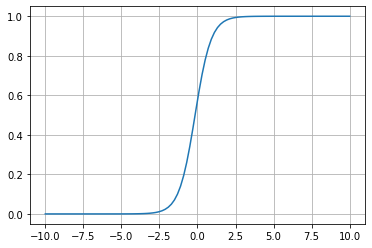

In [ ]:
w = 0.3 #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.1 #@param {type: "slider", min: -2, max: 2, step: 0.1}
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x, w, b))
plt.grid()
plt.show()

# Sigmoid for two variables

In [ ]:
sigmoid_2d = lambda x1, x2, w1, w2, b : 1/(1 + np.exp(-(w1*x1+w2*x2+b)))

In [ ]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 80)

X1, X2 = np.meshgrid(x1, x2)

X1.shape, X2.shape

((80, 100), (80, 100))

In [ ]:
w1 = 0.5; w2 = 0.5; b = 0
Y = sigmoid_2d(X1, X2, w1, w2, b)

In [ ]:
import matplotlib.colors

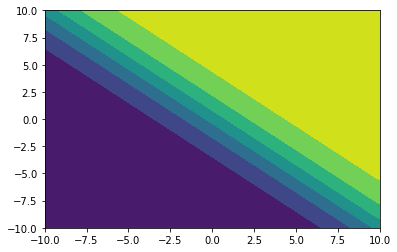

In [ ]:
plt.contourf(X1, X2, Y)
plt.show()

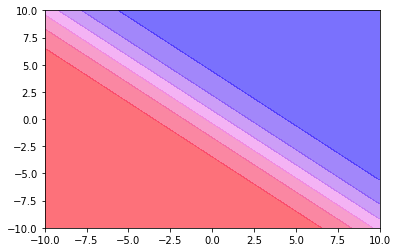

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "violet", "blue"])
plt.contourf(X1, X2, Y, cmap=my_cmap, alpha=0.6)
plt.show()

In [ ]:
Y.shape

(80, 100)

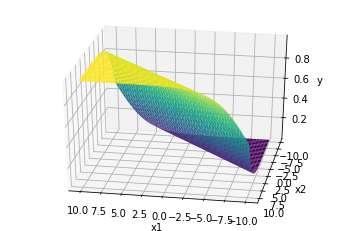

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 100)
plt.show()

# Compute Loss for a Given Dataset

In [ ]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10 # generate random nos from -10 to 10
Y = sigmoid(X, w_unknown, b_unknown)

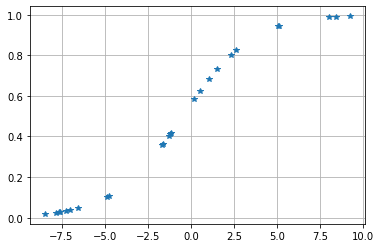

In [ ]:
plt.plot(X, Y, '*')
plt.grid()
plt.show()

In [ ]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [ ]:
W = np.linspace(0, 2, 100)
B = np.linspace(-1, 1, 100)

WW, BB = np.meshgrid(W, B) # go through every possible values of W and B

Loss = np.zeros(WW.shape)

In [ ]:
WW.shape, BB.shape, Loss.shape

((100, 100), (100, 100), (100, 100))

In [ ]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

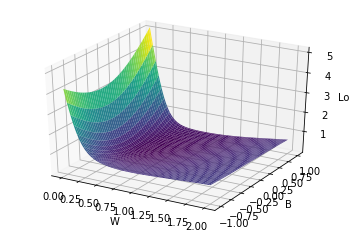

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

# ax.view_init(30, 100)
plt.show()

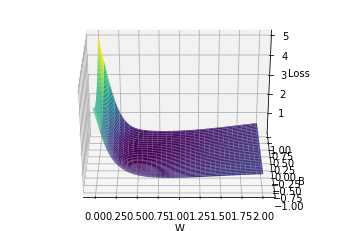

In [ ]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B) # go through every possible values of W and B

Loss = np.zeros(WW.shape)

# compute Loss
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30, 270)
plt.show()

In [ ]:
ij = np.argmin(Loss) # returns index of the min value index of the flattened array

In [ ]:
i = np.floor(ij/Loss.shape[1])
j = ij - i * Loss.shape[1]
i, j = int(i), int(j)

In [ ]:
WW[i, j], BB[i, j]

(0.5, 0.26)

# Class for Sigmoid Neuron

In [ ]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    """
    computes x1*w1 + x2*w2 . . . + b
    """
    def perceptron(self, x):
        return np.dot(x.reshape(1, -1), self.w.T) + self.b
    
    """
    computes 1 / (1 + e^-x)
    """
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        # compute the predicted value, 1 / (1 + e^perceptron(x))
        # perceptron(x) will give x1*w1+x2*w2 . . . +b
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        # compute the predicted value, 1 / (1 + e^perceptron(x))
        # perceptron(x) will give x1*w1+x2*w2 . . . +b
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * 1.0

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):

        # initialize w, b

        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        # run for epoch number of times
        for i in range(epochs):
            dw = 0
            db = 0
            # calculate delta_w and delta_b 
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)

            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            

In [ ]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    
    YY = np.zeros(XX1.shape)

    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=my_cmap)
    ax.plot()

# Fit for toy data

In [ ]:
X = np.array([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = np.array([1, 1, 1, 0, 0, 0])
X.shape, Y.shape

((6, 2), (6,))

[[0.06862408 1.07858504]] [[0.00021269]]
[[0.83653313 0.78620481]] [[0.01572117]]
[[0.96196671 0.50068811]] [[0.04992474]]
[[ 1.07404172 -0.0401527 ]] [[0.1317629]]
[[ 1.02558586 -0.62478204]] [[0.03845024]]
[[ 1.33230217 -0.13754069]] [[-0.04151841]]
[[ 1.25308695 -0.70694602]] [[-0.1457926]]
[[ 1.52664605 -0.25076801]] [[-0.22118002]]
[[ 1.45236252 -0.72559752]] [[-0.31597371]]
[[ 1.65349913 -0.3878435 ]] [[-0.37641774]]
[[ 1.61945548 -0.64702291]] [[-0.43666515]]
[[ 1.70621042 -0.52529265]] [[-0.4710805]]
[[ 1.72018388 -0.58430122]] [[-0.50325108]]
[[ 1.75389702 -0.57863805]] [[-0.52983918]]
[[ 1.77954627 -0.59014975]] [[-0.55503558]]
[[ 1.80492227 -0.59770524]] [[-0.57835844]]
[[ 1.82878019 -0.60532775]] [[-0.60017312]]
[[ 1.85144529 -0.61252516]] [[-0.62062868]]
[[ 1.87301769 -0.61937859]] [[-0.63987191]]
[[ 1.89359805 -0.6259182 ]] [[-0.65802666]]


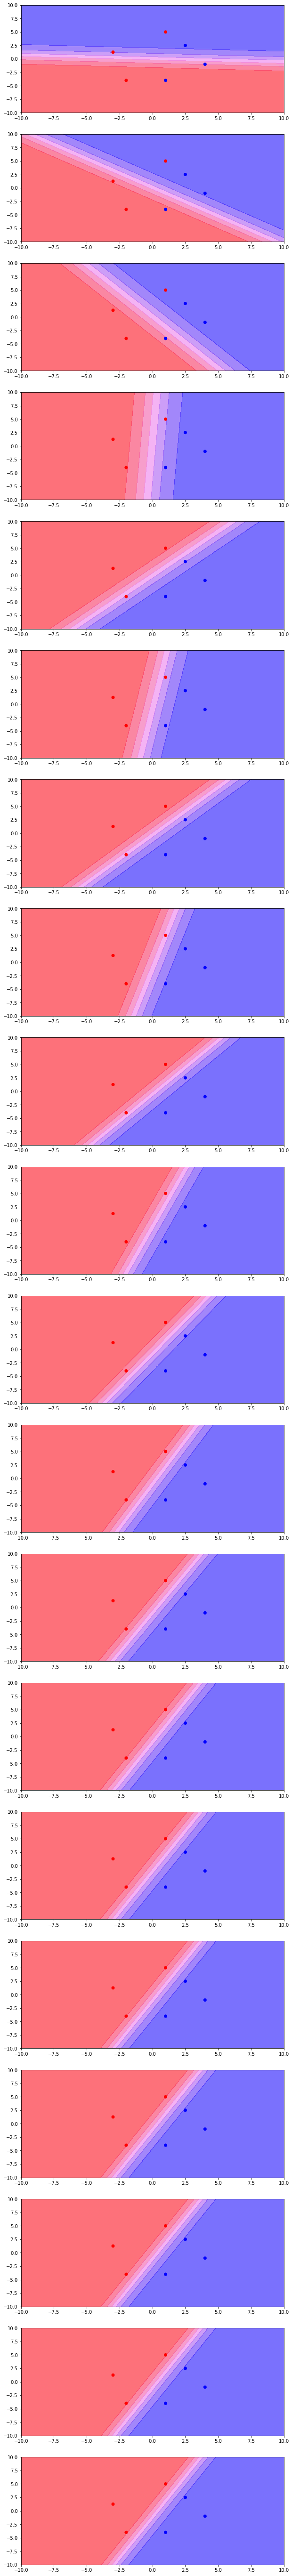

In [ ]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.01, True)

N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.75, False)
plt.show()